In [2]:
import os
import datetime
import json
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import toolz

In [1]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util
#reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)
from textrec.notebook_util import images, id2img, id2url, show_images

Loading COCO captions
Loading COCO id2url
Done


In [4]:
from textrec import automated_analyses

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading ONMT models...
coco_lm_adam_acc_46.00_ppl_16.32_e10_nooptim.pt
Loading model parameters.
coco_cap_adam_acc_48.73_ppl_12.56_e10_nooptim.pt
Loading model parameters.
Ready.
Loading SpaCy...done


In [120]:
valid_images = notebook_util.images_by_split['val']

Omitting:
* misspellings
* obvious grammar errors, e.g., incorrect preposition ("an open field with a pond on it")
* word choice that is unusual, awkward, or likely to be unfamiliar to participants
* sentences where uncommon punctuation is required to be grammatical (e.g., "farmers' market")
* anything that could be different if spoken then transcribed

In [121]:
bad_captions = set([
    "a bathroom with a marble counter top under a mirror",
    "a train sits on the tracks while people stand near by",
    "a famers market filled with lots of fresh produce",
    'a crowd of people sitting in a room with a clock tower in front',
    'a view from someone riding horseback in an open field with a pond on it',
    'a broccoli type vegetable is shown close up',
    'a shot of a separated bathroom with its toilet and shower separated',
    'man and a storm trooper waiting at a bus stop',
    'there is a woman that is recordign a concert with her cell phone',
    'statue of ghandi that people put a lei and a teddy bear on',
    'a blue brush gliding through beautiful brown hair',
    "a couple of horses standing on top of a lush green field",
    "a woman swinging a racket in her hand on a tennis court",
    "a young boy riding skis on top of a snow covered slope",
    "we can see a poodle and a lamp in two of three windows",
    "a big double deaker bus that is all pink",
    "a small action figure from futurerama holding a skate board",
    "a bathroom with a toilet sink and bathtub",
    "a large plain is at a airport terminal",
    "man focused with controller and window with wall"
    "dark room filled with people with its light coming through a window thats also a clock",
    "dark room filled with people with it's light coming through a window that's also a clock",
    "a plan parked on the cement near a terminal",
    "an area shows a room with a toilet with red wrappers on the floor and another room with a washing machine in it",
    "this is an image of a room with a bed table and bookcase",
    "a bathroom with a toilet, sink and bathtub",
    "a man in white top and shorts playing stick ball",
    "three elephants with tourists look at a temple",
    "a red and yellow high speed passenger train rolling along the track",
    "a cat looking around sitting beside someone that is watching t.v",
    "a kitchen with dishes, trash cans and other items, along with two windows",
    "a antique clock store with clocks for sale",
    "a desk with several keyboards, two screens and miscellaneous electronics",
    "a man that is standing next to a cow",
    "a black and white truck a hill and trees",
    "tank less toilet with cabinet in read and window seat",
    "baseball players in black white playing a game",
    "a stove top sitting on top of a kitchen center island",
    "a boy smiling while jumping on a skate board",
    "a plant of some sort on a bush",
    "a train traveling down tracks with a tent piece of metal attached to the front of it",
    "this is an image of a room with a bed table and bookcase,",
    "two houses grazing in a field next to a brick building",
    "a big, white seagull flies over a beach",
])

In [122]:
import random
random.seed(1)

caps = []
for img in random.sample(valid_images, 100):
    sents = img['sentences']
    sent_idx = random.choice(range(len(sents)))
    
    tokens = sents[sent_idx]['raw'].lower().strip().rstrip('.').split()
    sent = ' '.join(tokens)
    if sent in bad_captions:
        continue
    
    caps.append(dict(
        img_id=img['cocoid'],
        sent_idx=sent_idx,
        sent=sent,
        num_words=len(tokens)))

In [123]:
print('\n'.join(list(toolz.pluck('sent', caps))))

glazed donuts on a cooling rack have been bitten into
a couple of people on a beach flying a kite
people sitting at tables inside a large clock tower
little kids standing around a tennis court holding rackets
a group of young children playing in the snow next to each other
a person sitting in front of a computer monitor looking at their cellphone
man riding horse with a big group of horses following him
a skateboarder in the air after going up a ramp
two people perform flips on skis in front of a crowd
a woman leaning away from a horse that came near her
a man who is looking at his cell phone
a metal statue with a robe and a pole
a dog sitting near the window looking out of a brick building
the baseball memorabilia is being displayed in the showcase
the view is from the back of a horse, riding in a dry, grassy field towards a pond on a sunny say
a child sits on the floor looking at a toy
two brown and white giraffes near a girl in a light blue top
a person holding an orange in front of

In [124]:
for cap in caps:
    cap['taps_to_type'] = len(automated_analyses.taps_to_type(None, cap['sent']))
    cap['taps_per_word'] = cap['taps_to_type'] / cap['num_words']

In [125]:
caps.sort(key=lambda cap: cap['taps_per_word'])

In [126]:
len(caps)

71

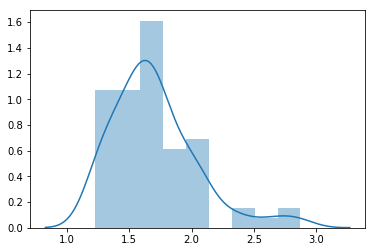

In [127]:
sns.distplot(list(toolz.pluck('taps_per_word', caps)))

In [128]:
num_caps = (
    3 # keyboards
    * 2 # extremes
    * 4)
caps_to_use = caps_to_use[:(num_caps//2)] + caps_to_use[-(num_caps//2):]
random.shuffle(caps_to_use)
len(caps_to_use), num_caps

(24, 24)

In [129]:
print(json.dumps([
    dict(
        stimulus=dict(type='img', content=cap['img_id'], url=notebook_util.id2url[cap['img_id']]),
        transcribe=cap['sent'])
    for cap in caps_to_use], indent=2))

[
  {
    "stimulus": {
      "type": "img",
      "content": 365928,
      "url": "http://images.cocodataset.org/train2017/000000365928.jpg"
    },
    "transcribe": "many umbrellas on a beach near a body of water"
  },
  {
    "stimulus": {
      "type": "img",
      "content": 27517,
      "url": "http://images.cocodataset.org/train2017/000000027517.jpg"
    },
    "transcribe": "a person holding their flip phone up in front of a computer"
  },
  {
    "stimulus": {
      "type": "img",
      "content": 3761,
      "url": "http://images.cocodataset.org/train2017/000000003761.jpg"
    },
    "transcribe": "a woman looks as if she is rejecting a kiss from a horse"
  },
  {
    "stimulus": {
      "type": "img",
      "content": 296303,
      "url": "http://images.cocodataset.org/train2017/000000296303.jpg"
    },
    "transcribe": "a giant cricket in a cage eating an orange slice"
  },
  {
    "stimulus": {
      "type": "img",
      "content": 358624,
      "url": "http://images.coco

In [130]:
pd.DataFrame(caps)

,img_id,num_words,sent,sent_idx,taps_per_word,taps_to_type
0,545407,9,a passenger jet that is flying in the sky,1,1.222222,11
1,81394,9,a white and blue truck parked on a street,3,1.222222,11
2,543193,9,a person on a bike rides down a street,2,1.222222,11
3,70460,13,a train on a track with a lot of graffiti writ...,4,1.230769,16
4,523252,8,a train is pulling into the train station,4,1.250000,10
5,319706,11,a cat sits on a desk in front of a computer,0,1.272727,14
6,305622,10,a couple of people on a beach flying a kite,2,1.300000,13
7,212853,10,a happy woman about to eat a slice of pizza,0,1.300000,13
8,260695,9,a man who is looking at his cell phone,0,1.333333,12
9,77792,9,a large truck on the side of a street,0,1.333333,12
